# Project 3: Quantum Dynamics
##    Eduardo Villaseñor - 
##    Eoin Horgan - 4582322



# Introducction

In this project we use numerical methods to simulate quantum systems by means of the time-dependent Schodinguer equation:
$$-i \frac{\partial\psi}{\partial t} = H \psi $$

To use nuemerical methods to use this equation two steps are required. Discretizing the Hamiltonian into a matrix by using a discretization of the space into a mesh. And the handling the time evolution (time derivative in the Schoringuer equation) by use of the Hamiltonian.

## Discretization of the Hamiltonian

The Hamiltonian is a operator that contains all the imformation about the dynamics of a quantum system
$$ H = - \frac{\hbar}{2m}\nabla^2  + \hat{V} $$

In order to model the Hamiltonian into a matrix we need to introducre a second order finite difference discretization of the problem into an uniform mesh of width $h$, to obtain a matrix of dimensions $h^{dim} \times h^{dim}$ where $dim$ equals to the dimension of the problem. Using the Taylor expansion each the second order derivatives in the
Hamiltonian can be aproximated as follows

$$ \frac{u(x+h,y) + u(x-h,y) - 2u(x,y)}{h^2}   -\frac{\partial^2 u}{\partial x^2} = 2 \frac{h^2}{4!} \frac{\partial^4 u}{\partial x^4} + \cdots $$

Where the error is of the order of $h$. Thus by we can see that by taking finer mesh we sacrifice computing time for precision in our model. Is important to note that the matrix obtained regarless of the dimension of our problem is a sparse matrix, thus by using *scipy.sparse* tools we can handle this matrices with much ease.


## Time evolution
The time evolution of the wave function is found using the Crank-Nicolson method:
$$\psi^{n+1} = \frac{1-i\Delta t H_D/2}{1+i\Delta t H_D/2} \psi^n $$

Where the in this case the time is discretized into $\Delta t$ steps. 


In [9]:
import quantum_plots as qplots
import numpy as np
import simulation as sm
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1D Simulations:
### Potential Well

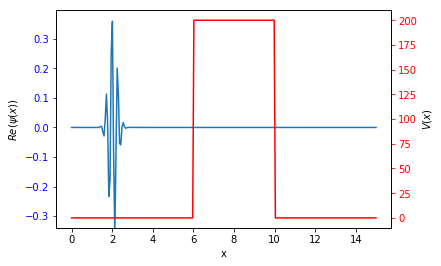

In [10]:
# Define the system parameters
dim = 1
numberPoints = 256
dt = .001
dirichletBC = False
startPoint = 0
domainLength = 15


def potentialWell(x):
    mag = 200
    domain = [6, 10]
    if domain[0] < x < domain[1]:
        return mag
    else:
        return 0




# Create the simulation for the system
sim = sm.Simulation(dim=dim, potentialFunc=potentialWell,
                    dirichletBC=dirichletBC, numberPoints=numberPoints,
                    startPoint=startPoint, domainLength=domainLength,
                    dt=dt)

# Create the initial wave function
sim.setPsiPulse(pulse="plane", energy=500, center=2)

ani = qplots.animation1D(sim, psi='real', V=np.vectorize(potentialWell))
HTML(ani.to_html5_video())